In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sc
import os
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
#reading the file for doing case study
df=pd.read_excel("Telecom_data.xlsx")
#looking on the data type of input data
df.dtypes

Month_Year                datetime64[ns]
LSA                               object
Service_Provider                  object
Technology                        object
Median_Speed                     float64
Median_Signal_Strength           float64
dtype: object

In [3]:
df.shape

(3371, 6)

In [4]:
df.head()

,Month_Year,LSA,Service_Provider,Technology,Median_Speed,Median_Signal_Strength
0,2018-03-01,Andhra Pradesh,AIRTEL,3G,1.105,-85.0
1,2018-03-01,Andhra Pradesh,IDEA,3G,1.880,-81.0
2,2018-03-01,Andhra Pradesh,AIRTEL,4G,5.190,-97.0
3,2018-03-01,Andhra Pradesh,IDEA,4G,2.120,-91.0
4,2018-03-01,Andhra Pradesh,JIO,4G,6.940,-91.0


In [5]:
df.dtypes

Month_Year                datetime64[ns]
LSA                               object
Service_Provider                  object
Technology                        object
Median_Speed                     float64
Median_Signal_Strength           float64
dtype: object

In [6]:
df.head()

,Month_Year,LSA,Service_Provider,Technology,Median_Speed,Median_Signal_Strength
0,2018-03-01,Andhra Pradesh,AIRTEL,3G,1.105,-85.0
1,2018-03-01,Andhra Pradesh,IDEA,3G,1.880,-81.0
2,2018-03-01,Andhra Pradesh,AIRTEL,4G,5.190,-97.0
3,2018-03-01,Andhra Pradesh,IDEA,4G,2.120,-91.0
4,2018-03-01,Andhra Pradesh,JIO,4G,6.940,-91.0


In [7]:
#Identification of mising values in dataframe
df.isna().sum()/(len(df))*100

Month_Year                0.0
LSA                       0.0
Service_Provider          0.0
Technology                0.0
Median_Speed              0.0
Median_Signal_Strength    0.0
dtype: float64

***Wow! No Missing values found in dataframe***

# Solution to Q.1.: Provide summary statistics of data speed and signal strength in your LSA (i.e. the LSA in which you live: Haryana)

In [12]:
#subsetting of dataframe for Haryana LSA
df_haryana=df[df['LSA']=="Haryana"]
#Statistical summary for Haryana LSA 4G data
df_haryana_4g = df_haryana[df_haryana['Technology']=="4G"]
df_haryana_4g.describe()

,Median_Speed,Median_Signal_Strength
count,100.00000,100.000000
mean,5.20629,-93.950000
std,4.42201,4.478625
min,1.40300,-102.000000
25%,2.92100,-96.500000
50%,4.27300,-95.000000
75%,5.51850,-93.000000
max,32.49000,-69.000000


In [13]:
#Statistical summary for Haryana LSA 3G data
df_haryana_3g = df_haryana[df_haryana['Technology']=="3G"]
df_haryana_3g.describe()

,Median_Speed,Median_Signal_Strength
count,72.000000,72.000000
mean,1.522306,-83.638889
std,0.927624,6.753832
min,0.266000,-99.000000
25%,0.836000,-87.250000
50%,1.338250,-84.000000
75%,2.070625,-80.750000
max,4.380000,-57.000000


# Question2: Draw a side-by-side box plot of 4G data speeds in your LSA and that in Karnataka LSA? Do you see any significant difference in data speeds between the two LSAs?  

In [14]:
Haryana4GMediaSpeed=df.loc[(df.LSA == 'Haryana') & (df.Technology == '4G') ,'Median_Speed']
Karnataka4GMediaSpeed=df.loc[(df.LSA == 'Karnataka') & (df.Technology == '4G') ,'Median_Speed']

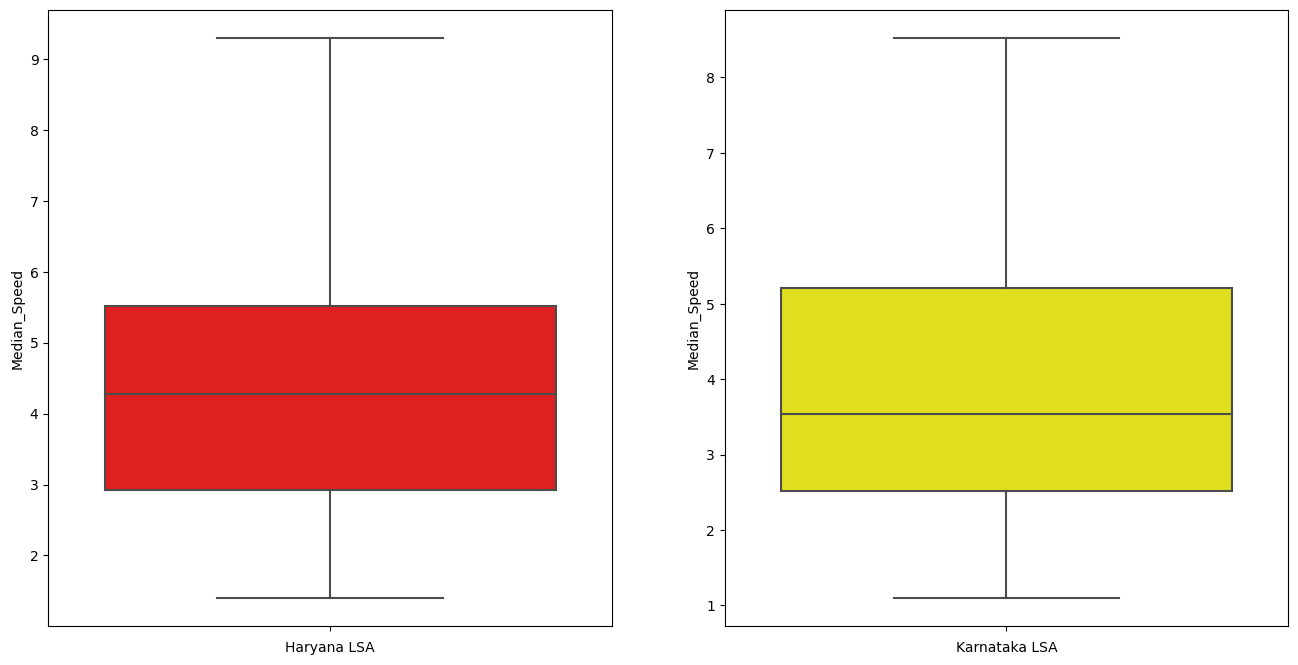

In [15]:
#box plot
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
sns.boxplot(y=Haryana4GMediaSpeed,color='red', showfliers= False).set(xlabel = "Haryana LSA")
plt.subplot(1,2,2)
sns.boxplot(y=Karnataka4GMediaSpeed,color='yellow', showfliers= False).set(xlabel = "Karnataka LSA")
plt.show()


**From above diagram it is clear that 50th percentile of Haryana Median Speed is more than that of karnataka. Variation in Haryana speed is more than than that of karnataka**

# Question3: State the hypothesis; perform the required test, and prove whether the average 4G data speed in your LSA significantly different from that experienced in Karnataka LSA?

**This is the third Use case where we form null hypothesis as**

**H0=Average 4G Data speed in Haryana LSA is equal to Average 4G Data speed in Karnataka LSA**

**H1=Average 4G Data speed in Haryana LSA is not equal to Average 4G Data speed in Karnataka LSA**

In [16]:
def test_hypothesis_2sample_t_test(sample1,sample2,threshold):
    out=sc.stats.ttest_ind(sample1,sample2,equal_var=False)
    print (out)
    pNullProb=round(out.pvalue*100,4)
    print ('Probablity of Null hypothesis is '+str(pNullProb)+'%')
    if pNullProb<threshold:
        print ('Which is less than the threshold of '+str(threshold)+ ' %')
        return 'Reject The Null Hypothesis'
    else:
        print ('Which is greater than the threshold of '+str(threshold)+ '%')
        return 'Fail to Reject the Null Hypothesis'
#print (out.pvalue)

In [17]:
#test our first usecase that is average speed of 4 g netwtork for Haryana and karnataka with 95% accuracy.
#Hence take a threshold=5
test_hypothesis_2sample_t_test(Haryana4GMediaSpeed,Karnataka4GMediaSpeed,5)

Ttest_indResult(statistic=-1.170000387624187, pvalue=0.243867679084539)
Probablity of Null hypothesis is 24.3868%
Which is greater than the threshold of 5%


'Fail to Reject the Null Hypothesis'

**Hence we fail to reject the null hypothesis that Average 4G Data speed in Haryana LSA is equal to Average 4G Data speed in Karnataka LSA.**

# Question4: State the hypothesis; perform the required test, and prove whether the speeds of 4G networks of different operators across India are the same or different.

**This is fourth use case. Here we want to check whether speed of different operators is same or different.**

**H0=mean('Airtel')=mean('Idea')=mean('Vodafone')=mean('Jio')
H1= atleast one of the 4 has different speed**

**Hence we want to solve this problem using 2 methods:**
**1. One way Annova**
**2. One way annova using OLS**

**First approach is one way annova function for which we are calculating 4g median speed for different operators in order to pass it to one way annova function**

In [18]:
AirtelSpeed=df.loc[(df.Service_Provider == 'AIRTEL') & (df.Technology=='4G') ,'Median_Speed']
JioSpeed=df.loc[(df.Service_Provider == 'JIO')  & (df.Technology=='4G') ,'Median_Speed']
VodafoneSpeed=df.loc[(df.Service_Provider == 'VODAFONE')  & (df.Technology=='4G') ,'Median_Speed']
IdeaSpeed=df.loc[(df.Service_Provider == 'IDEA')  & (df.Technology=='4G') ,'Median_Speed']

In [19]:
AirtelSpeed.describe()

count    550.000000
mean       5.555664
std        2.359917
min        0.316000
25%        3.915500
50%        5.247000
75%        6.970875
max       23.966000
Name: Median_Speed, dtype: float64

In [20]:
JioSpeed.describe()

count    550.000000
mean      10.724174
std       10.995220
min        0.301000
25%        3.440875
50%        5.675500
75%       13.378750
max       52.255000
Name: Median_Speed, dtype: float64

In [21]:
VodafoneSpeed.describe()

count    443.000000
mean       4.058477
std        2.852434
min        0.003500
25%        2.150000
50%        3.565000
75%        5.260750
max       34.462000
Name: Median_Speed, dtype: float64

In [22]:
IdeaSpeed.describe()

count    484.000000
mean       4.025926
std        2.813295
min        0.008000
25%        2.411375
50%        3.538500
75%        4.938125
max       30.462500
Name: Median_Speed, dtype: float64

In [23]:
F, p = sc.stats.f_oneway(AirtelSpeed,JioSpeed,VodafoneSpeed,IdeaSpeed)
print (F,p)
pNullProb=round(p*100,4)
threshold=5#% of accuracy we want to check
print ('Probablity of Null hypothesis is '+str(pNullProb)+'%')
if pNullProb<threshold:
    print ('Which is less than the threshold of '+str(threshold)+ ' %')
    print('reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')
    print ('Which is greater than the threshold of '+str(threshold)+ '%')

138.61234867890528 1.1257937711258157e-81
Probablity of Null hypothesis is 0.0%
Which is less than the threshold of 5 %
reject the null hypothesis


**Second approach for same problem is to implement it through OLS. Below is the implementation using OLS**

In [25]:
data_4g=df.loc[ (df.Technology == '4G') ,:]
model = ols('Median_Speed ~ C(Service_Provider)', data=data_4g).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Median_Speed   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     138.6
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           1.13e-81
Time:                        13:23:22   Log-Likelihood:                -6560.5
No. Observations:                2027   AIC:                         1.313e+04
Df Residuals:                    2023   BIC:                         1.315e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           5.5557      0.263     21.140      0.000       5.040       6.071
C(Service_Provider)[T.IDEA]        -1.5297      0.384     -3.982      0.000      -2.283      -0.776
C(Service_Provider)[T.JIO]          5.1685      0.372     13.906      0.000       4.440       5.897
C(Service_Provider)[T.VODAFONE]    -1.4972      0.393     -3.805      0.000      -2.269      -0.726
==============================================================================
Omnibus:                     1249.649   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14326.468
Skew:                           2.757   Prob(JB):                         0.00
Kurtosis:                      14.799   Cond. No.                         4.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
table=sm.stats.anova_lm(model,type=2)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Service_Provider),3.0,15796.426878,5265.475626,138.612349,1.125794e-81
Residual,2023.0,76847.822674,37.987060,NaN,NaN


**Hence using both both implementations of  One way annova i.e f_oneway and OLS in this usecase case we reject the null hypotesis that each opertor has same mean speed and we accept the alternate hypothesis that atleast one operator has different speed**

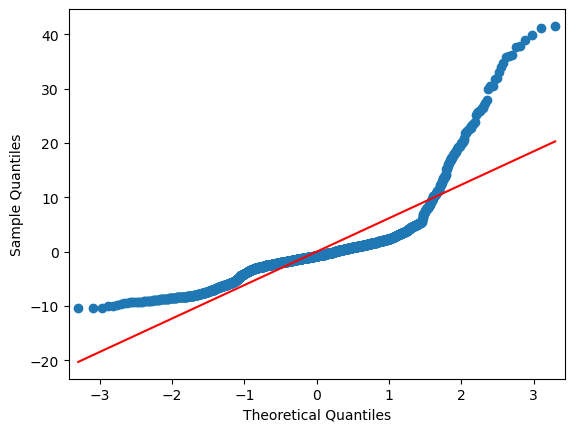

In [27]:
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()

# Question5: State the hypothesis; perform the required test, and prove whether the average data speed of 3G networks in the country is the same or different from that of 4G networks.

**This is the fifthcase where we form null hypothesis as**
**H0=Average speed of 3G network is equal to Average Speed of 4G Network**
**H1=Average speed of 3G network is not equal to Average Speed of 4G Network**

In [28]:
_3GMediaSpeed=df.loc[df.Technology == '3G' ,'Median_Speed']
_4GMediaSpeed=df.loc[ (df.Technology == '4G') ,'Median_Speed']

In [29]:
_3GMediaSpeed.describe()

count    1344.000000
mean        1.473943
std         1.080059
min         0.003000
25%         0.835750
50%         1.186000
75%         1.799750
max        10.371000
Name: Median_Speed, dtype: float64

In [30]:
_4GMediaSpeed.describe()

count    2027.000000
mean        6.265596
std         6.762223
min         0.003500
25%         2.923500
50%         4.519000
75%         6.537250
max        52.255000
Name: Median_Speed, dtype: float64

In [31]:
#test null hypothesis that 3g speed is equal to 4g speed with 95% accuracy.
#Hence take a threshold=5
test_hypothesis_2sample_t_test(_3GMediaSpeed,_4GMediaSpeed,5)

Ttest_indResult(statistic=-31.305803397422597, pvalue=5.454221160852939e-178)
Probablity of Null hypothesis is 0.0%
Which is less than the threshold of 5 %


'Reject The Null Hypothesis'

**Hence we reject the null hypothesis and accept the alternate hypothesis that Average speed of 3G network is not equal to Average Speed of 4G Network**

# Question 6: State the hypothesis; perform the required test, and prove whether the average signal strength of 3G networks in the country is the same or different across LSAs.

**H0= 3G meadian Signal Strength is same across all LSA's**
**H1= 3G meadian Signal Strength is different in atleast one LSA**
**Here we want to compare signal strength of 3G network across all LSA's. This is typical implementation of one way annova.**

In [32]:
df_3g=df.loc[(df.Technology=='3G'),:]

In [33]:
df_3g.describe()

,Median_Speed,Median_Signal_Strength
count,1344.000000,1344.000000
mean,1.473943,-84.802455
std,1.080059,6.302607
min,0.003000,-107.000000
25%,0.835750,-88.000000
50%,1.186000,-85.000000
75%,1.799750,-83.000000
max,10.371000,-51.000000


In [34]:
df_3g.head()

,Month_Year,LSA,Service_Provider,Technology,Median_Speed,Median_Signal_Strength
0,2018-03-01,Andhra Pradesh,AIRTEL,3G,1.105,-85.0
1,2018-03-01,Andhra Pradesh,IDEA,3G,1.880,-81.0
5,2018-03-01,Assam,AIRTEL,3G,1.555,-85.0
6,2018-03-01,Assam,VODAFONE,3G,0.340,-85.0
11,2018-03-01,Bihar,AIRTEL,3G,1.090,-83.0


In [35]:
model = ols('Median_Signal_Strength ~ C(LSA)', data=df_3g).fit()
table=sm.stats.anova_lm(model,type=2)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
C(LSA),21.0,6898.835546,328.515978,9.350006,4.185082e-28
Residual,1322.0,46448.966351,35.135375,NaN,NaN


**Since P Value is significantly less than .05 we can reject the null hypothesis and accept alternate hypothesis that 3G meadian Signal Strength is different in atleast one LSA**

# Question 7: State the hypothesis; perform the required test, and prove whether the average speed of 4G networks in the country is the same or different across LSAs and operators.

**H0=Average speed of 4G network is same across LSA's and Operators**
**H1=Average speed of 4G network is different at least for one LSA across Operators**

**This is typically a two way ANOVA problem with two variables, in order to see intersection of 2 variables in 2 way ANOVA**

In [36]:
df_4g=df.loc[(df.Technology=='4G'),:]

In [37]:
df_4g.describe()

,Median_Speed,Median_Signal_Strength
count,2027.000000,2027.000000
mean,6.265596,-93.184509
std,6.762223,6.354627
min,0.003500,-111.000000
25%,2.923500,-97.000000
50%,4.519000,-95.000000
75%,6.537250,-91.500000
max,52.255000,-57.000000


In [38]:
df_4g.head()

,Month_Year,LSA,Service_Provider,Technology,Median_Speed,Median_Signal_Strength
2,2018-03-01,Andhra Pradesh,AIRTEL,4G,5.190,-97.0
3,2018-03-01,Andhra Pradesh,IDEA,4G,2.120,-91.0
4,2018-03-01,Andhra Pradesh,JIO,4G,6.940,-91.0
7,2018-03-01,Assam,AIRTEL,4G,5.715,-97.0
8,2018-03-01,Assam,IDEA,4G,4.000,-99.0


In [39]:
model = ols('Median_Speed ~ C(LSA)*C(Service_Provider)', data=df_4g).fit()
table=sm.stats.anova_lm(model,type=2)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
C(LSA),21.0,5222.516929,248.691282,8.637255,3.902815e-26
C(Service_Provider),3.0,15832.541698,5277.513899,183.292453,1.259245e-104
C(LSA):C(Service_Provider),63.0,15759.835877,250.156125,8.688131,2.800617e-67
Residual,1939.0,55829.355047,28.792860,NaN,NaN


**Since All 3 P Values are significantly lower than .05 hence we reject null hypothesis and accept the alternate hypothesis that Average speed of 4G network is different in at least one combination LSA and Operators**

# Question 8: Discuss briefly your recommendations to the operators.

***Following are observations of this case study:***
    ***1. We fail to reject the null hypothesis that Average 4G Data speed in Haryana LSA is equal to Average 4G Data speed in Karnataka LSA.***
    ***2. We reject the null hypotesis that each opertor has same mean speed and we accept the alternate hypothesis that atleast one operator has different speed***
    ***3. We reject the null hypothesis and accept the alternate hypothesis that Average speed of 3G network is not equal to Average Speed of 4G Network***
    ***4.  we reject the null hypothesis and accept alternate hypothesis that 3G meadian Signal Strength is different in atleast one LSA***
    ***5.  we reject null hypothesis and accept the alternate hypothesis that Average speed of 4G network is different in at least one combination LSA and Operators***

***The conclusion is that***

 ***Average Speed achieved from 4G technology is not eaual to that of 3g Technology***
    ***Average Signal Strength of 3G technology is not same across country***
    ***Average speed of 4G is different across LSA's and operators***
    
   ***Hence common finding is that telecom speed and signal strength is not uniformly distributed across the geography for all operators***

# Recommendations to the operators

***1.Different operators must have similar 3G & 4G speeds in same LSA as ground conditions for all operators are same.***
***2. Operators should do necessary upgradations in their infra to avoid so much variance in an LSA itself for proper network quality***
***3. Operators should work to lower the variance in their speeds among different LSAs to provide better connectivities to far flung LSAs as well for overall betterment of unconnected areas.***